# Assigment 1 - KNN Algorithm

# Part A: Model Code (60 pts)


1. Write a function to calculate and return the Minkowski distance with optional argument p 
defaulting to ‘p=2’ (Euclidean) of two vectors where a vector represents a data point. [6 pts]

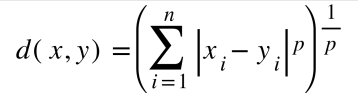


In [2]:
# Import Libraries
import numpy as np
import random
import math
from collections import Counter

def minkowskiDistance(A, B, p=2):
    # This function will calculate the Minkowski distance
    # The default value for p is 2
    
    if len(A) == 0 or len(B) == 0:
        print("One of the vectores is empty")
        return None
    
    aux = []
    
    # First, iterate through each value of both arrays
    # Calculate the absolute of a-b
    # Elevate abs to p
    
    for x, y in zip(A, B):
        #print("x:",x)
        #print("y",y)
        aux.append(pow(abs(x-y),p))
        
    # Sum each of the values in the aux list
    
    sumatory = sum(aux)
    return pow(sumatory, 1/p)


#vector1 = [2,6,7,9]
#vector2 = [1,3,4,7]

#vector1 = []
#vector2 = []

# Using python list

#A = random.sample(range(1, 20), 5)
#B = random.sample(range(1, 20), 4)

# Using np array

A = np.array(np.random.randint(1,20,size=5))
B = np.array(np.random.randint(1,20,size=5))

print("vector1", A)
print("vector2", B)

result = minkowskiDistance(A,B, 3)

print(result)
    
    

vector1 [10 12 10  2  8]
vector2 [12 14  2 14  1]
13.748925535875212


2. Write a function to calculate and return the accuracy of two vectors. [4 pts]

In [3]:
def accuracy(A,B):
    #check formula to clarify, however this values will return the same % as skilearn accuracy
    # A is test values, B is prediction
    
    # N total number of test values
    N = A.shape[0]

    return ( A == B).sum() / N

3. Write three functions to compute: precision, recall and F1 score. [6 pts]


In [ ]:
# Precision

# JUST FOR REFERENCE, DELETE LATER
# Precision Score = TP / (FP + TP)
# It messures the success of prediction when the classes are very imbalanced

"""
TP = TOTAL POSITIVE
FP = FALSE POSITIVE
FN = FALSE NEGATIVE

"""

def precision(TP,FP):
    return TP/(FP+TP)

# Recall Score = TP / (FN + TP)
# It is a useful measure of success of prediction when the classes are very imbalanced

def recall(TP,FP):
    return TP/(FN+TP)

def F1(TP,FP):
    PS = precision(TP,FP)
    RS = recall(TP,FP)
    return 2* PS * RS / (PS + RS)


    
    

4. Write a function to compute the confusion matrix of two vectors. [4 pts]


In [ ]:
def computeConfussionMatrix(A,B):
    print("Return confussion matrix")

5. Write a function to generate the Receiver Operating Characteristic (ROC) curve. [5 pts]

6. Write a function to compute area under curve (AUC) for the ROC curve. [5 pts]


7. Write a function to generate the precision-recall curve. [5 pts]


8. Implement a KNN_Classifier model class. It should have the following three methods. [20
pts]


In [7]:
class KNN_Classifier:
    
    
    
    def __init__(self, n_neighbors = 5, weights = 'uniform', p = 2):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.p = p     
    
    def fit(self, X, Y):
            
        """
        X : ndarray A numpy array with rows representing data samples and columns representing features.
        Y : ndarray A 1D numpy array with labels corresponding to each row of the feature matrix X.
        """
        self.x_train = X
        self.y_train = Y
        
    def euclideanDistance(x1,y1,x2,y2):
        return ((x2-x1)**2+(y2-y1)**2)**0.5
        
        
    def predict(self, x_test):

        y_pred_knn = []
        
        ## Iterate through each value in test data 
        for val in x_test:
            euc_dis = []
            
            ## Finding eucledian distance for all points in training data 
            for point in self.x_train:
                euc_dis.append(((val-point)**2)**0.5)
                #euc_dis.append(self.euclideanDistance(val[0],val[1],point[0],point[1]))

            temp_target = self.y_train.tolist()
            
            ## Sort the euclidean distances 
            euc_dis.sort()
            
            ## Finding majority among the neighbours 
            vote = [0,0,0]
            ## We are using only the first three entries (K = 3)
            
            #print(temp_target)
            
            for arr in temp_target:
                for i in range(3):
                    #print(arr[i])
                    vote.append(arr[i])
            y_pred_knn.append(vote.index(max(vote)))

        return y_pred_knn
    
    def predict_proba(self, X):
        """
        X: ndarray A numpy array containing samples to be used for prediction. Its rows represent data
        samples and columns represent features.
        Returns: 1D array of prediction probabilities for positive class for each row in X. The 1D
        array should be designed as a column vector.
        """
    
    def get_params(self):
        """
        Returns: dict Model parameter names mapped to their values.
        """
        
        return {
                "n_neighbors" : n_neighbors,
                "weights" : weights,
                "p": p
               }
    
    def set_params(self, **params):
        """
        **params : dict A dictionary with the model parameter names to change mapped to their values
        """
        self.n_neighbors = params["n_neighbors"]
        self.weights = params["weights"]
        self.p = params["p"]        
    
    

In [50]:
cl = KNN_Classifier(5,'uniform',2)

cl.fit(x_train,y_train)

y_pred = cl.predict(x_test)

#cl.predict(x_test)

print(y_pred)

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [71]:
y_train

array([[ 7.8 ,  0.3 ,  0.37, ...,  3.32,  0.62, 10.  ],
       [ 7.8 ,  0.3 ,  0.37, ...,  3.32,  0.62, 10.  ],
       [ 7.8 ,  0.3 ,  0.37, ...,  3.32,  0.62, 10.  ],
       ...,
       [ 6.2 ,  0.25,  0.38, ...,  3.17,  0.46,  9.1 ],
       [ 7.8 ,  0.3 ,  0.37, ...,  3.32,  0.62, 10.  ],
       [ 7.8 ,  0.3 ,  0.37, ...,  3.32,  0.62, 10.  ]])

9. Write a function named “partition” to split your data into training and test sets. The function
should take 4 arguments: [ 5 pts]


Part B: Data Processing, Feature Selection, and Initial Estimation (40 pts)

10. Read in the winequality-white.csv file as a Pandas data frame.

In [72]:
import pandas as pd
df = pd.read_csv ('winequality-white.csv',sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


11. The target will be the “quality” column which represents the rating of wine and ranges from
3 to 8. You will need to convert it into a two-category variable consisting of “good” 
(quality>5) & “bad” (quality <= 5). Your target vector should have 0s (representing “bad” quality
wine) and 1s (representing “good” quality wine). [2 pts]

In [73]:
target = []
for x in df['quality']:
    if x > 5:
        ## Good Wine
        target.append(1)
    elif x<= 5:
        ## Bad Wine
        target.append(0)

df["quality"] = target
        
df.head()




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


12. Provide a table with univariate statistics of your data (mean, standard deviation, and
quartiles, min, max, missing count, number of unique values). [4 pts]

In [5]:
# Count, mean, standard deviation, quartiles, min, max

print(df.describe())

#print(df.describe())

# Missing Count
n_missing = df.isnull().sum()

print("Missing values\n", n_missing)

# Number of Unique Values
#n_unique = len(pd.unique(df)) 
#print("Number of Unique Values", n_unique)


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


13. Generate pair plots using the seaborn package to help identify redundant features. For any
redundant features(?), report, drop, and explain your logic (w/ markdown). [4 pts]


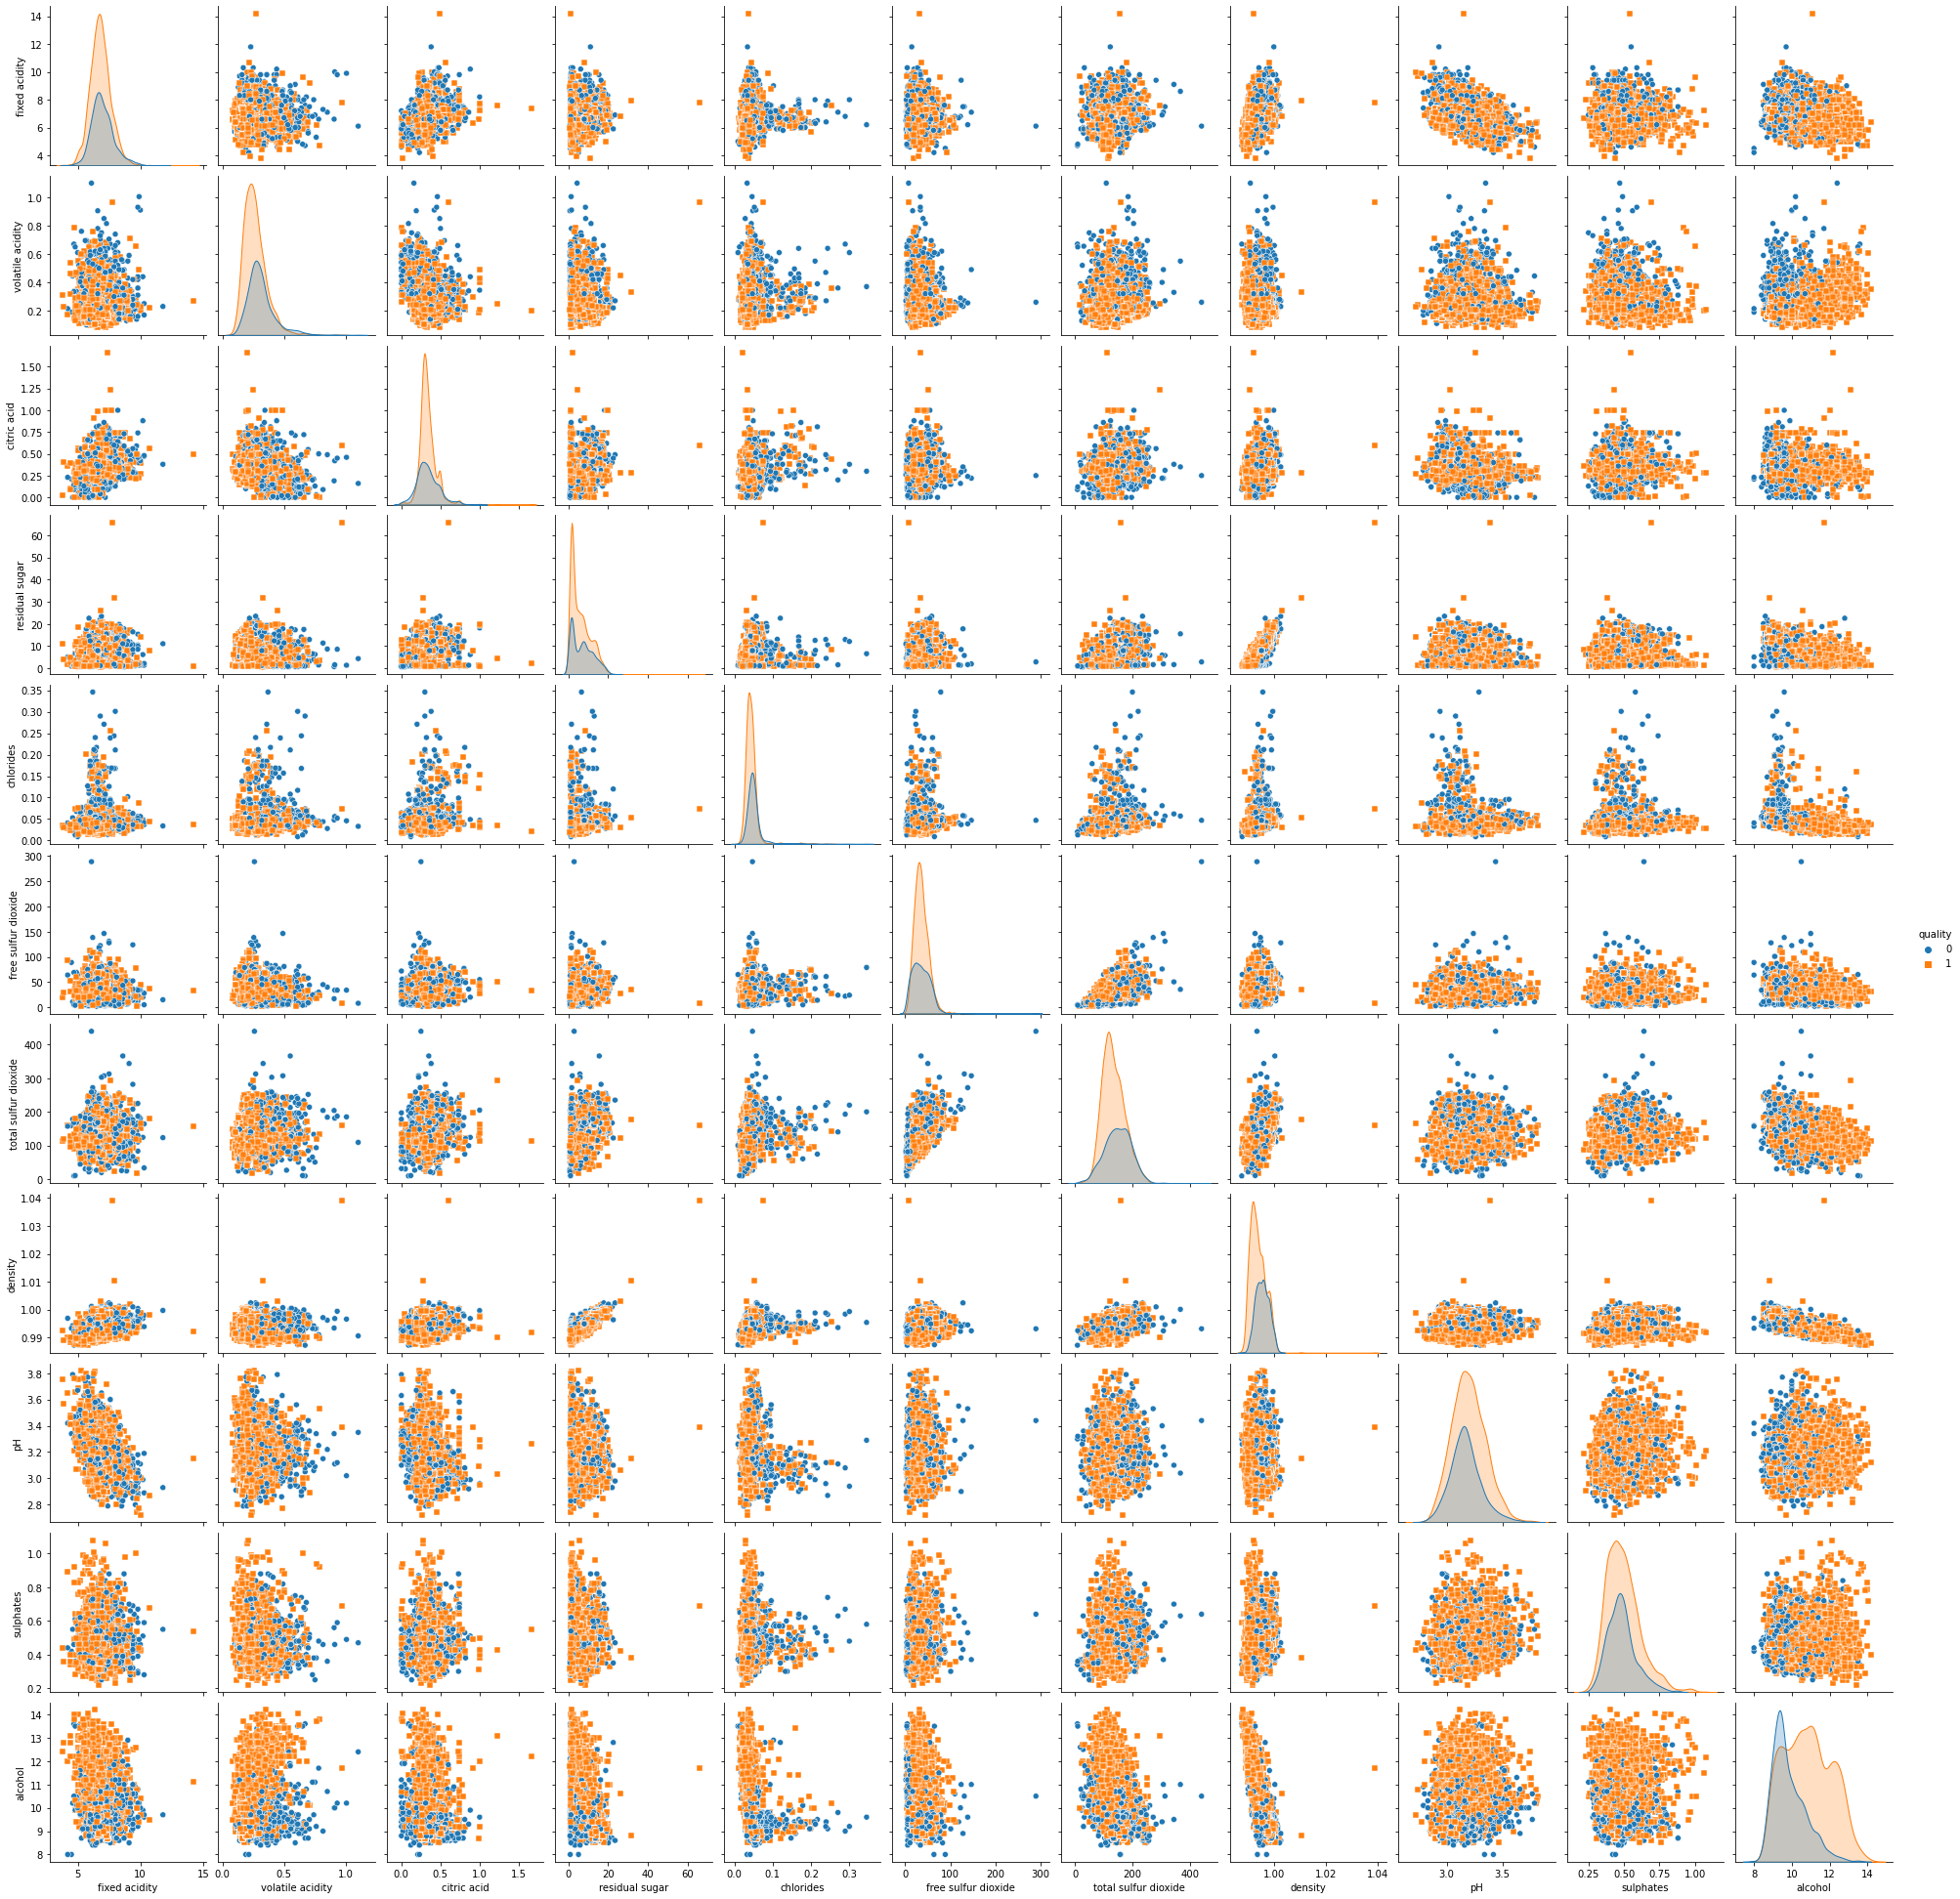

In [7]:
import seaborn

seaborn.pairplot(df, hue='quality',markers=["o", "s"])



In [9]:
# just for testing, not part of the assigment

import matplotlib.pyplot as plt
import seaborn as sns

def boxplot(df):
    fig, ax, = plt.subplots(ncols=6,nrows=2,figsize=(20,10))
    index = 0
    ax = ax.flatten()

    for col, value in df.items():
        sns.boxplot(y=col, data=df, ax = ax[index])
        index +=1
    
    plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

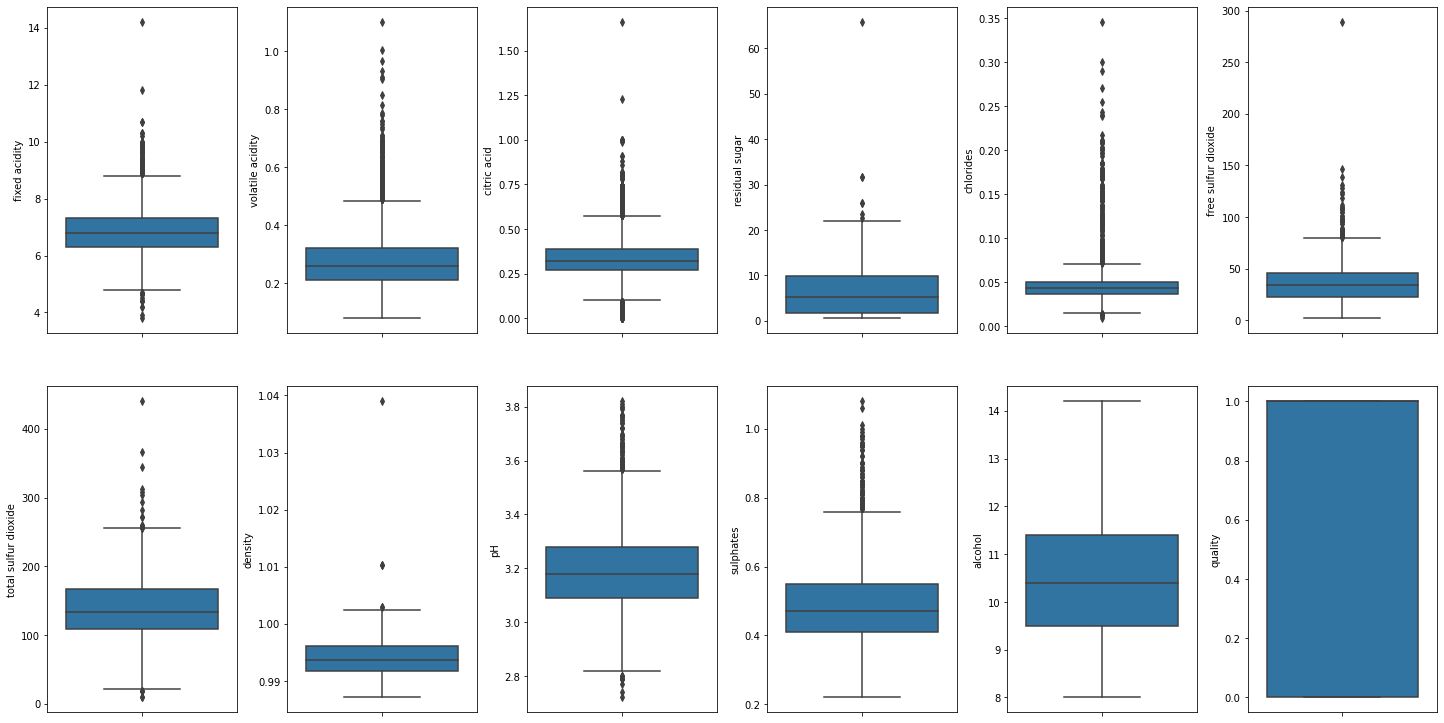

In [22]:
boxplot(df)

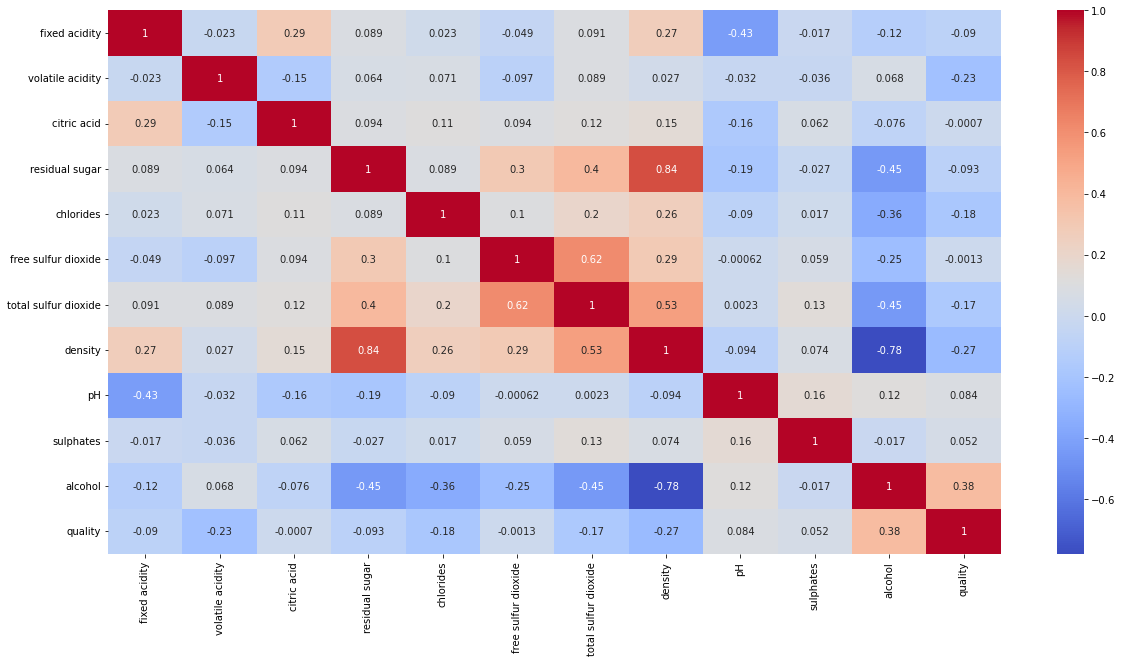

In [10]:
# For testing, not part of assigment

def plotCorrelationMatrix(df):
    corr = df.corr()
    plt.figure(figsize=(20,10))
    sns.heatmap(corr,annot=True,cmap='coolwarm')
    
plotCorrelationMatrix(df)


14. Use your “partition” function to split the data into 80% train and 20% test. [5 pts]


In [74]:
# Test based on correlation (not part of assigment)

X = df.drop(columns=['quality'])
y= df['quality']


In [76]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4893    1
4894    0
4895    1
4896    1
4897    1
Name: quality, Length: 4898, dtype: int64

In [2]:
def partition( feature_matrix, target_vector, t, shuffle = True):
    """
    * Feature matrix (numpy array with rows representing data samples and columns representing features.),
    * Target vector (numpy array with labels corresponding to each row of the feature matrix)        
    """

    # shuffle (default=True) where shuffle is a boolean whether to shuffle the data prior to
    # partitioning. You will be required to use “shuffle=True” for this assignment

    #feature_matrix.sort_values()

    # consult this part
    if shuffle:
        #feature_matrix.sample(frac=1).reset_index(drop=True)   
        np.random.shuffle(feature_matrix)

    # Create a dataframe with all training data, removing the target column


    # t where t is a real number to determine the size of partition. For example, if t is set to 
    # 0.2, then 80% of the data will be used for training and 20% for testing

    # t must be a number between 0 and 1

    train_split_limit = int(1-t * len(feature_matrix))
    test_split_limit = int(1-t * len(feature_matrix))

    x_train = feature_matrix[:train_split_limit]
    x_test = feature_matrix[test_split_limit:]
    
    
    # y_data represents the data only from the target

    y_data = feature_matrix[target_vector]
    
    # split target_vector

    y_train = y_data[:train_split_limit]
    y_test = y_data[test_split_limit:]

    # This function should return two feature matrices for training and test data, 
    # and two target vectors for training and test data

    
    print(y_train)
    #return x_train, x_test, y_train, y_test


#x_train, x_test, y_train, y_test = partition(X, y, 0.2, True)

In [78]:
# convert dataframe data to numpy array

X = X.to_numpy()
y = y.to_numpy()

partition(X, y, 0.2, True)


#x_train, x_test, y_train, y_test = partition(X, ['quality'],0.2, True)

# This will split only 100 rows. Splitting all the records is fast, however running the prediction would be slow
#x_train, x_test, y_train, y_test = partition(X, y, 0.2, True)


(array([[ 8.  ,  0.23,  0.28, ...,  3.26,  0.72,  9.5 ],
        [ 7.  ,  0.2 ,  0.34, ...,  3.25,  0.46, 11.6 ],
        [ 7.  ,  0.15,  0.34, ...,  3.32,  0.62, 10.8 ],
        ...,
        [ 6.6 ,  0.52,  0.44, ...,  3.26,  0.54,  9.3 ],
        [ 6.5 ,  0.43,  0.28, ...,  3.02,  0.38, 12.4 ],
        [ 6.6 ,  0.27,  0.33, ...,  3.29,  0.46, 10.7 ]]),
 array([[ 7.4 ,  0.26,  0.32, ...,  3.1 ,  0.67, 12.5 ],
        [ 7.4 ,  0.25,  0.49, ...,  3.13,  0.55, 11.3 ],
        [ 6.6 ,  0.26,  0.27, ...,  3.36,  0.62, 10.5 ],
        ...,
        [ 6.8 ,  0.21,  0.4 , ...,  3.18,  0.53, 12.  ],
        [ 5.8 ,  0.42,  0.3 , ...,  3.32,  0.47, 12.9 ],
        [ 5.8 ,  0.2 ,  0.34, ...,  3.5 ,  0.42, 11.7 ]]),
 array([[ 7.  ,  0.2 ,  0.34, ...,  3.25,  0.46, 11.6 ],
        [ 7.  ,  0.2 ,  0.34, ...,  3.25,  0.46, 11.6 ],
        [ 7.  ,  0.2 ,  0.34, ...,  3.25,  0.46, 11.6 ],
        ...,
        [ 8.  ,  0.23,  0.28, ...,  3.26,  0.72,  9.5 ],
        [ 7.  ,  0.2 ,  0.34, ...,  3.25,  0.

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## We take a range of values for K(1 to 20) and find the accuracy 
## so that we can visualize how accuracy changes based on value of K
accuracy = []
for n in range(1,21):
    clf = KNeighborsClassifier(n_neighbors = n)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_pred))
## Plotting the accuracies for different values of K
plt.figure(figsize=(16,9))
plt.plot(range(1,21),accuracy)

ValueError: Unknown label type: 'continuous-multioutput'

In [18]:
y_test

array([[7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00],
       [7.200e+00, 2.300e-01, 3.200e-01, 8.500e+00, 5.800e-02, 4.700e+01,
        1.860e+02, 9.956e-01, 3.190e+00, 4.000e-01, 9.900e+00]])

15. Naively run your KNN_Classifier model on the training dataset with n_neighbors = 5 and
using Euclidean distance. [15 pts]

In [42]:
print(prediction[0])

{0.045: 5, 0.16: 5, 0.32: 5, 0.47: 5, 0.9949: 5, 3.18: 5, 6.2: 5, 7.0: 5, 9.6: 5, 30.0: 5, 136.0: 5}


In [43]:
prediction

[{0.045: 5,
  0.16: 5,
  0.32: 5,
  0.47: 5,
  0.9949: 5,
  3.18: 5,
  6.2: 5,
  7.0: 5,
  9.6: 5,
  30.0: 5,
  136.0: 5},
 {0.045: 5,
  0.16: 5,
  0.32: 5,
  0.47: 5,
  0.9949: 5,
  3.18: 5,
  6.2: 5,
  7.0: 5,
  9.6: 5,
  30.0: 5,
  136.0: 5},
 {0.045: 5,
  0.16: 5,
  0.32: 5,
  0.47: 5,
  0.9949: 5,
  3.18: 5,
  6.2: 5,
  7.0: 5,
  9.6: 5,
  30.0: 5,
  136.0: 5}]